1. What question(s) are you trying to solve (or prove wrong)?

    Is there any corelation between Year Published, Minimum Number of Players, Maximum Number of Players, Playing Time, Average Complexity, Domains with Average Rating and BGG Rank?

    - Year vs Rating: Classic vs Modern
    - Min/Max (Avg) number of Players vs Rating
    - Playing Time vs Rating
    - Complexity vs Rating
    - Domians vs Rating

    Goal
    - Predict hwo to adjust the Min, Max number of Players, Playing Time and Complexity to make a good Board Game or a good selling game.

    Further:
    
    - Year vs Playing Time
    - Year vs Complexity
    - Min/Max (Avg) number vs Playing Time
    - Min/Max (Avg) number vs Complexity


2. What kind of data do you have and how do you treat different types?

    a. Qualitative data: 
        - Nominal: Domains
    b. Quantitative data:
        - Discrete: Year Published, Minimum Number of Players, Maximum Number of Players, BGG Rank
        - Continous: Playing Time, Average Complexity,  Average Rating


3. What’s missing from the data and how do you deal with it?

    Some factual data can be obtained from internet, such as Year Published and Minimum Number of Players.


4. Where are the outliers and why should you care about them?
  
  
5. How can you add, change or remove features to get more out of your data?

# Import Libraries

In [46]:
#!pip3 install scipy
#!pip3 install wordcloud
#!pip3 install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from wordcloud import WordCloud
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [47]:
data_path = "dataset/BGG_Data_Set.csv"
df = pd.read_csv(data_path, encoding = 'ISO-8859-1')


In [48]:
df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB


In [50]:
df.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,20327.000000,20342.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20343.000000,20320.000000
mean,108216.245142,1984.249877,2.019712,5.672221,91.294548,9.601485,840.971391,6.403227,10172.890429,1.991188,1408.457628
std,98682.097298,214.003181,0.690366,15.231376,545.447203,3.645458,3511.562220,0.935911,5872.831597,0.848903,5040.179315
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.050000,1.000000,0.000000,0.000000
25%,11029.000000,2001.000000,2.000000,4.000000,30.000000,8.000000,55.000000,5.820000,5087.500000,1.330000,146.000000
50%,88931.000000,2011.000000,2.000000,4.000000,45.000000,10.000000,120.000000,6.430000,10173.000000,1.970000,309.000000
75%,192939.500000,2016.000000,2.000000,6.000000,90.000000,12.000000,385.000000,7.030000,15258.500000,2.540000,864.000000
max,331787.000000,2022.000000,10.000000,999.000000,60000.000000,25.000000,102214.000000,9.580000,20344.000000,5.000000,155312.000000


In [51]:
df.isna().sum()

ID                       16
Name                      0
Year Published            1
Min Players               0
Max Players               0
Play Time                 0
Min Age                   0
Users Rated               0
Rating Average            0
BGG Rank                  0
Complexity Average        0
Owned Users              23
Mechanics              1598
Domains               10159
dtype: int64

# Data Cleansing

1. Year Published: Drop the row with no value (only 1 datum, not big effect on the data)
2. Min Players: The min of Min Players is 0, which means missing data. This data is important for prediction. If not too much missing data, we will drop those row. If too much, we will consider other approach.
3. Max Players: Same as "Min Players"
4. Play Time: Same as "Min Players"
5. Min Age: This column seems irrelevant because average age of players will be better. Also, people tend to ignore it. So we will drop the whole column.
6. Complexity Average: Same as "Min Players"
7. Owned Users: There are 23 missing data. Need to check 0 values also, same as "Min Player"
8. Mechanics: Same as "Min Player"
9. Domains: Drop the whole column as there are too many missing values

In [52]:
# Total number: 20343
df_total_number = df["Name"].count()
print("Original number of entries in dataset:", df_total_number)
df = df.dropna(subset = ["Year Published"])
df = df.drop(columns = ["Min Age", "Domains"])
df.info()


Original number of entries in dataset: 20343
<class 'pandas.core.frame.DataFrame'>
Index: 20342 entries, 0 to 20342
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20342 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20342 non-null  int64  
 4   Max Players         20342 non-null  int64  
 5   Play Time           20342 non-null  int64  
 6   Users Rated         20342 non-null  int64  
 7   Rating Average      20342 non-null  float64
 8   BGG Rank            20342 non-null  int64  
 9   Complexity Average  20342 non-null  float64
 10  Owned Users         20320 non-null  float64
 11  Mechanics           18745 non-null  object 
dtypes: float64(5), int64(5), object(2)
memory usage: 2.0+ MB


In [53]:
print("Number of 0 in Min Players:", (df["Min Players"] == 0).sum(), ", percentage: {:.2f}%".format(((df["Min Players"] == 0).sum() / df_total_number * 100)))
print("Number of 0 in Max Players:", (df["Max Players"] == 0).sum(), ", percentage: {:.2f}%".format(((df["Max Players"] == 0).sum() / df_total_number * 100)))
print("Number of 0 in Play Time:", (df["Play Time"] == 0).sum(), ", percentage: {:.2f}%".format(((df["Play Time"] == 0).sum() / df_total_number * 100)))
print("Number of 0 in Complexity Average:", (df["Complexity Average"] == 0).sum(), ", percentage: {:.2f}%".format(((df["Complexity Average"] == 0).sum() / df_total_number * 100)))
print("Number of 0 and missing values in Owned Users:", (df["Owned Users"] == 0).sum() + df["Owned Users"].isna().sum(), ", percentage: {:.2f}%".format(((df["Owned Users"] == 0).sum() + df["Owned Users"].isna().sum())/ df_total_number * 100))

Number of 0 in Min Players: 46 , percentage: 0.23%
Number of 0 in Max Players: 161 , percentage: 0.79%
Number of 0 in Play Time: 556 , percentage: 2.73%
Number of 0 in Complexity Average: 426 , percentage: 2.09%
Number of 0 and missing values in Owned Users: 23 , percentage: 0.11%


In [54]:
df2 = df[(df["Min Players"] > 0) & (df["Max Players"] > 0) & (df["Play Time"] > 0) & (df["Complexity Average"] > 0) & (df["Owned Users"] > 0)]
df2 = df2.dropna(subset = ["Year Published"])
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19264 entries, 0 to 20342
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  19264 non-null  float64
 1   Name                19264 non-null  object 
 2   Year Published      19264 non-null  float64
 3   Min Players         19264 non-null  int64  
 4   Max Players         19264 non-null  int64  
 5   Play Time           19264 non-null  int64  
 6   Users Rated         19264 non-null  int64  
 7   Rating Average      19264 non-null  float64
 8   BGG Rank            19264 non-null  int64  
 9   Complexity Average  19264 non-null  float64
 10  Owned Users         19264 non-null  float64
 11  Mechanics           17863 non-null  object 
dtypes: float64(5), int64(5), object(2)
memory usage: 1.9+ MB
None


In [55]:
df2_total_number = df2["Name"].count()
print("Original entries:", df_total_number)
print("Remaining data in df2:", df2_total_number, "percentage: {:.2f} %".format(df2_total_number / df_total_number * 100))

Original entries: 20343
Remaining data in df2: 19264 percentage: 94.70 %


In [56]:
# confirm there are no missing data (except "Mechanics")
df2.isna().sum()

ID                       0
Name                     0
Year Published           0
Min Players              0
Max Players              0
Play Time                0
Users Rated              0
Rating Average           0
BGG Rank                 0
Complexity Average       0
Owned Users              0
Mechanics             1401
dtype: int64

In [57]:
df2.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics
0,174430.0,Gloomhaven,2017.0,1,4,120,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat..."
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme..."
2,224517.0,Brass: Birmingham,2018.0,2,4,120,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ..."
3,167791.0,Terraforming Mars,2016.0,1,5,120,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han..."
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar..."


In [58]:
df2.describe()

,ID,Year Published,Min Players,Max Players,Play Time,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users
count,19264.000000,19264.00000,19264.000000,19264.000000,19264.000000,19264.000000,19264.000000,19264.000000,19264.000000,19264.000000
mean,106801.388756,1987.69918,2.020349,5.643792,94.382319,884.738009,6.416946,9948.304402,2.034187,1475.601952
std,98354.325867,195.46978,0.679420,15.287971,558.566856,3603.528455,0.918656,5887.779121,0.801634,5167.866097
min,1.000000,-3500.00000,1.000000,1.000000,1.000000,30.000000,1.050000,1.000000,1.000000,3.000000
25%,10260.250000,2001.00000,2.000000,4.000000,30.000000,59.000000,5.840000,4833.750000,1.340000,153.000000
50%,85448.000000,2011.00000,2.000000,4.000000,45.000000,132.000000,6.440000,9790.500000,2.000000,334.000000
75%,191632.250000,2016.00000,2.000000,6.000000,90.000000,416.000000,7.030000,15028.250000,2.560000,924.000000
max,331787.000000,2022.00000,10.000000,999.000000,60000.000000,102214.000000,9.540000,20344.000000,5.000000,155312.000000


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19264 entries, 0 to 20342
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  19264 non-null  float64
 1   Name                19264 non-null  object 
 2   Year Published      19264 non-null  float64
 3   Min Players         19264 non-null  int64  
 4   Max Players         19264 non-null  int64  
 5   Play Time           19264 non-null  int64  
 6   Users Rated         19264 non-null  int64  
 7   Rating Average      19264 non-null  float64
 8   BGG Rank            19264 non-null  int64  
 9   Complexity Average  19264 non-null  float64
 10  Owned Users         19264 non-null  float64
 11  Mechanics           17863 non-null  object 
dtypes: float64(5), int64(5), object(2)
memory usage: 1.9+ MB


# Year Published
As the range of "Year Published" is so wide (-3500 to 2022), and most games are published after 19 centuries (1st quartile), to show the data appropriately, we need to define new category for "Year Published".

In [60]:
#To check the distribution of century published
df2['century'] = ((df2['Year Published'] - 1) // 100)+ 1
df2_century = df2.groupby("century").count()
df2_century.head(30)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics
century,,,,,,,,,,,,
-35.0,1,1,1,1,1,1,1,1,1,1,1,1
-30.0,1,1,1,1,1,1,1,1,1,1,1,1
-26.0,1,1,1,1,1,1,1,1,1,1,1,1
-22.0,1,1,1,1,1,1,1,1,1,1,1,1
-14.0,2,2,2,2,2,2,2,2,2,2,2,2
-13.0,1,1,1,1,1,1,1,1,1,1,1,1
-2.0,1,1,1,1,1,1,1,1,1,1,1,1
-1.0,1,1,1,1,1,1,1,1,1,1,1,1
0.0,142,142,142,142,142,142,142,142,142,142,142,123


In [61]:
df2.reset_index(inplace = True)
df2["Year(grouped)"] = 0

for i in range(0, df2["Year Published"].count()):
    if df2["Year Published"][i] <= 1800:
        df2["Year(grouped)"][i] = "19th Century or before" # <= 1800 
    elif df2["Year Published"][i] <= 1850:
        df2["Year(grouped)"][i] = "1801 - 1850"
    elif df2["Year Published"][i] <= 1900:
        df2["Year(grouped)"][i] = "1851 - 1900"
    elif df2["Year Published"][i] <= 1950:
        df2["Year(grouped)"][i] = "1901 - 1950"
    elif df2["Year Published"][i] <= 2000:
        df2["Year(grouped)"][i] = "1951 - 2000"
    else:
        df2["Year(grouped)"][i] = "2001 - 2022"

df2.groupby("Year(grouped)").count().head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_26744\3173304857.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["Year(grouped)"][i] = "2001 - 2022"
C:\Users\user\AppData\Local\Temp\ipykernel_26744\3173304857.py:16: SettingWithCopyWarnin

,index,ID,Name,Year Published,Min Players,Max Players,Play Time,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,century
Year(grouped),,,,,,,,,,,,,,
1801 - 1850,15,15,15,15,15,15,15,15,15,15,15,15,12,15
1851 - 1900,30,30,30,30,30,30,30,30,30,30,30,30,23,30
1901 - 1950,92,92,92,92,92,92,92,92,92,92,92,92,79,92
1951 - 2000,4471,4471,4471,4471,4471,4471,4471,4471,4471,4471,4471,4471,4028,4471
19th Century or before,207,207,207,207,207,207,207,207,207,207,207,207,182,207
2001 - 2022,14449,14449,14449,14449,14449,14449,14449,14449,14449,14449,14449,14449,13539,14449


In [62]:
df[(df["Year Published"] > 1950) & (df["Year Published"] <= 2000)].groupby("Year Published").count()

,ID,Name,Min Players,Max Players,Play Time,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics
Year Published,,,,,,,,,,,
1951.0,2,2,2,2,2,2,2,2,2,2,2
1952.0,4,4,4,4,4,4,4,4,4,4,3
1953.0,5,5,5,5,5,5,5,5,5,5,5
1954.0,7,7,7,7,7,7,7,7,7,7,6
1955.0,5,5,5,5,5,5,5,5,5,5,4
1956.0,9,9,9,9,9,9,9,9,9,9,9
1957.0,2,2,2,2,2,2,2,2,2,2,1
1958.0,9,9,9,9,9,9,9,9,9,9,9
1959.0,11,11,11,11,11,11,11,11,11,11,9


In [63]:
for i in range(0, df2["Year Published"].count()):
    if df2["Year Published"][i] <= 1950:
        df2["Year(grouped)"][i] = "1950 or before"
    elif df2["Year Published"][i] <= 1960:
        df2["Year(grouped)"][i] = "1951 - 1960"
    elif df2["Year Published"][i] <= 1970:
        df2["Year(grouped)"][i] = "1961 - 1970"
    elif df2["Year Published"][i] <= 1980:
        df2["Year(grouped)"][i] = "1971 - 1980"
    elif df2["Year Published"][i] <= 1990:
        df2["Year(grouped)"][i] = "1981 - 1990"
    elif df2["Year Published"][i] <= 2000:
        df2["Year(grouped)"][i] = "1991 - 2000"
    elif df2["Year Published"][i] <= 2010:
        df2["Year(grouped)"][i] = "2001 - 2010"                
    else:
        df2["Year(grouped)"][i] = "2011 - 2022"

df2.groupby("Year(grouped)").count().head(10)

,index,ID,Name,Year Published,Min Players,Max Players,Play Time,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,century
Year(grouped),,,,,,,,,,,,,,
1950 or before,344,344,344,344,344,344,344,344,344,344,344,344,296,344
1951 - 1960,71,71,71,71,71,71,71,71,71,71,71,71,63,71
1961 - 1970,196,196,196,196,196,196,196,196,196,196,196,196,168,196
1971 - 1980,842,842,842,842,842,842,842,842,842,842,842,842,789,842
1981 - 1990,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1272,1178,1272
1991 - 2000,2090,2090,2090,2090,2090,2090,2090,2090,2090,2090,2090,2090,1830,2090
2001 - 2010,4781,4781,4781,4781,4781,4781,4781,4781,4781,4781,4781,4781,4318,4781
2011 - 2022,9668,9668,9668,9668,9668,9668,9668,9668,9668,9668,9668,9668,9221,9668


<Axes: title={'center': 'Distribution of Published Year(grouped)'}, xlabel='Year(grouped)', ylabel='count'>

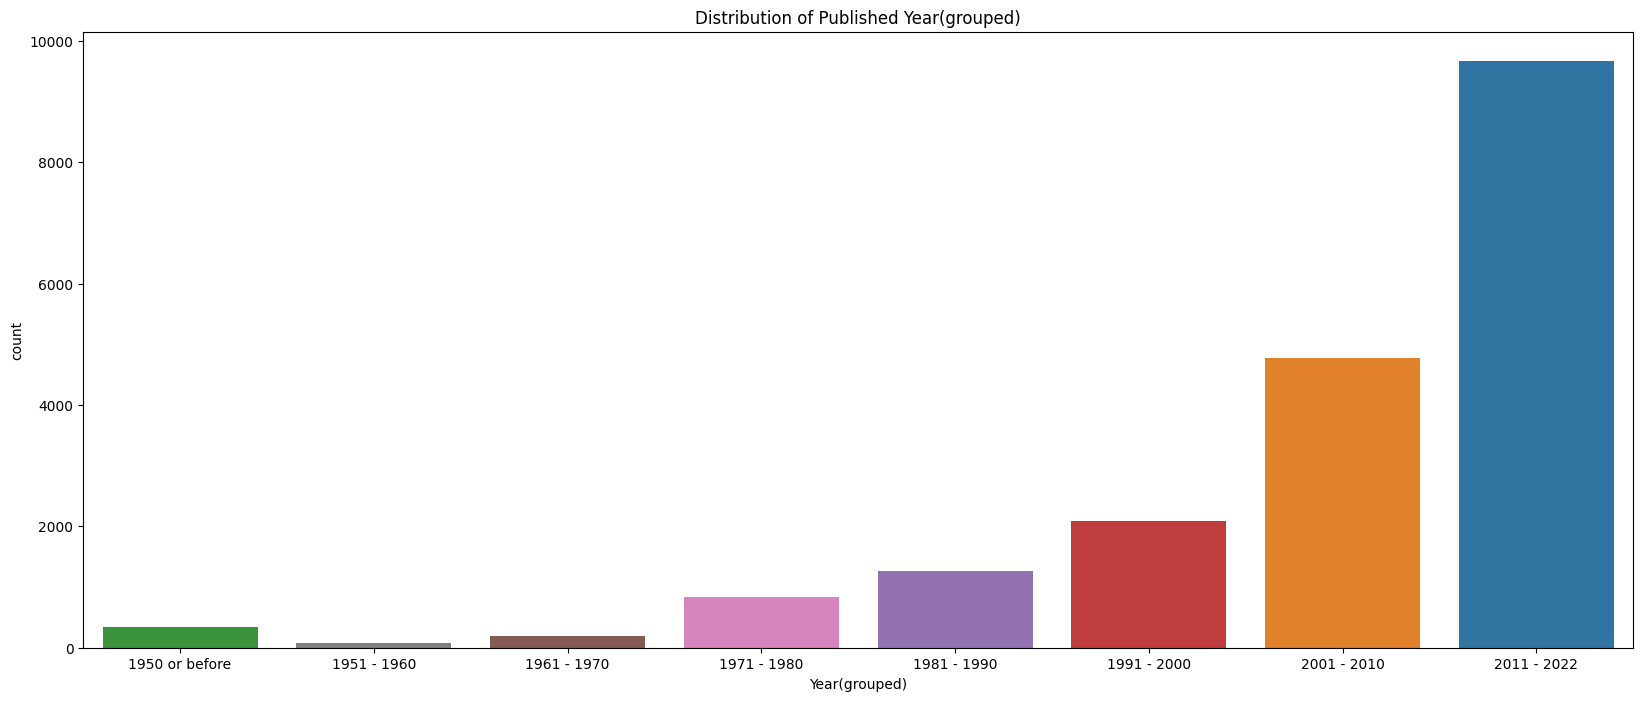

In [64]:
year_grouped_list = sorted(list(set(df2["Year(grouped)"].sort_values())))

plt.figure(figsize=(20,8))
plt.title("Distribution of Published Year(grouped)")
sns.countplot(x = "Year(grouped)", data = df2, hue = "Year(grouped)", order = year_grouped_list)

# Min Player


<Axes: title={'center': 'Distribution of Min Players'}, xlabel='Min Players', ylabel='count'>

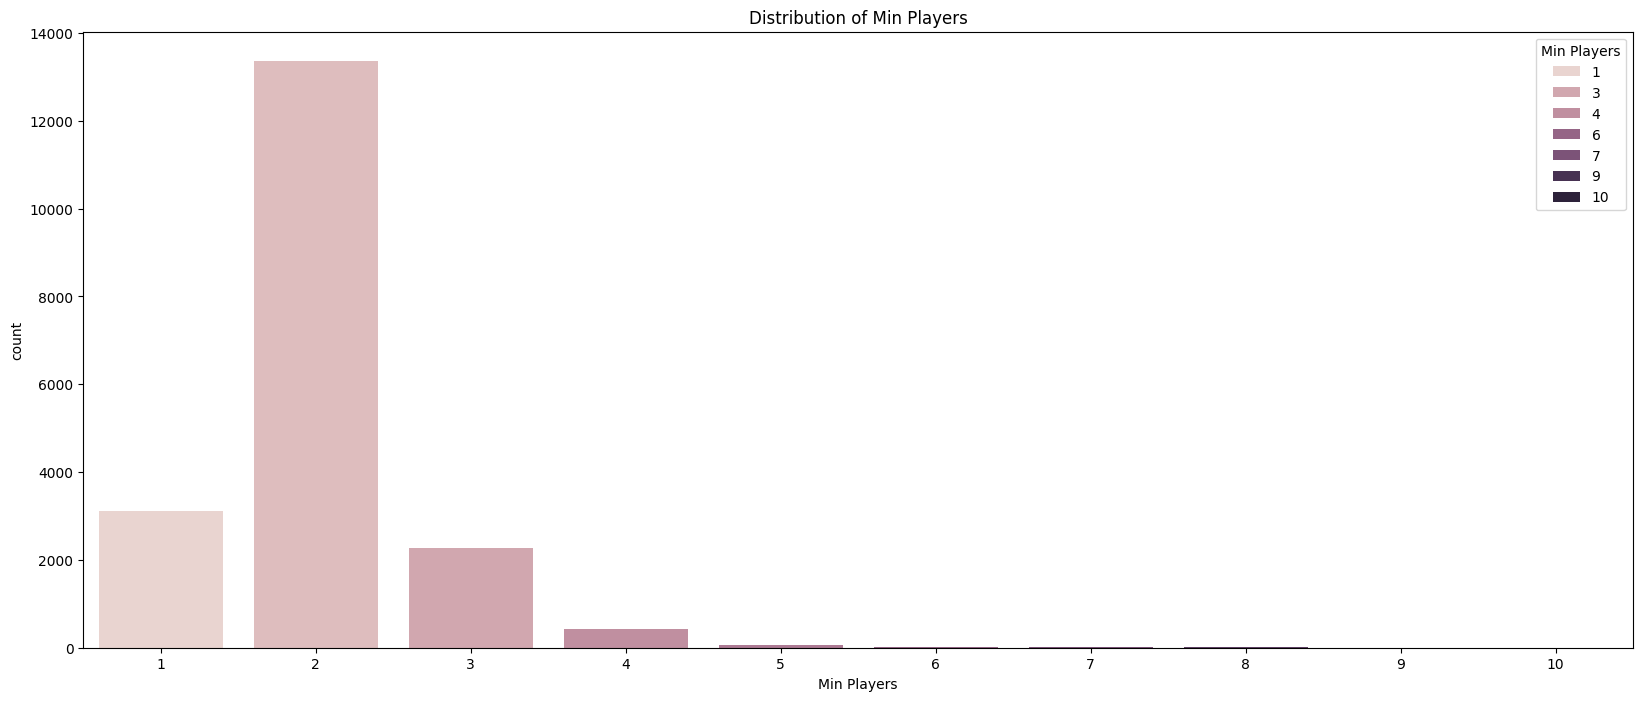

In [65]:
min_player_list = sorted(list(set(df2["Min Players"].sort_values())))

plt.figure(figsize=(20,8))
plt.title("Distribution of Min Players")
sns.countplot(x = "Min Players", data = df2, hue = "Min Players", order = min_player_list)

C:\Users\user\AppData\Local\Temp\ipykernel_26744\1454242130.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["Min Players(grouped)"][i] = str(df2["Min Players"][i])
C:\Users\user\AppData\Local\Temp\ipykernel_26744\1454242130.py:7: Set

<Axes: title={'center': 'Distribution of Min Players(grouped)'}, xlabel='Min Players(grouped)', ylabel='count'>

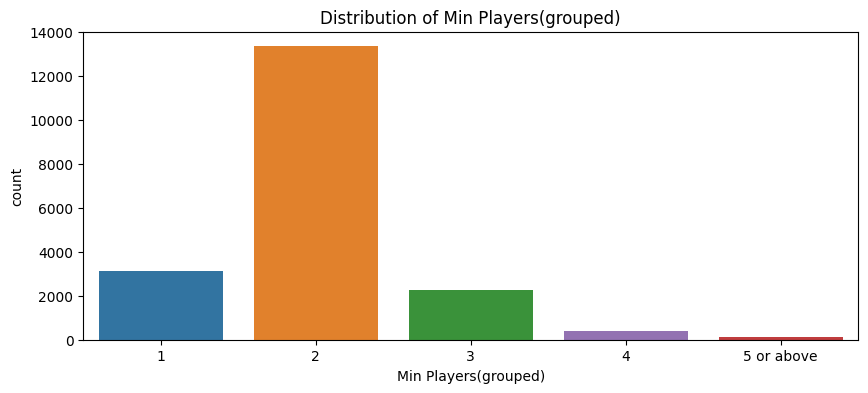

In [66]:
# As the sizes for 5 or above are too small, so we group them into a single group
df2["Min Players(grouped)"] = 0
for i in range(0, df2["Min Players"].count()):
    if df2["Min Players"][i] >= 5:
        df2["Min Players(grouped)"][i] = "5 or above"
    else:
        df2["Min Players(grouped)"][i] = str(df2["Min Players"][i])

min_player_list2 = sorted(list(set(df2["Min Players(grouped)"].sort_values())))
plt.figure(figsize=(10,4))
plt.title("Distribution of Min Players(grouped)")
sns.countplot(x = "Min Players(grouped)", data = df2, hue = "Min Players(grouped)", order = min_player_list2)

# Max Players

<Axes: title={'center': 'Distribution of Max Players'}, xlabel='Max Players', ylabel='count'>

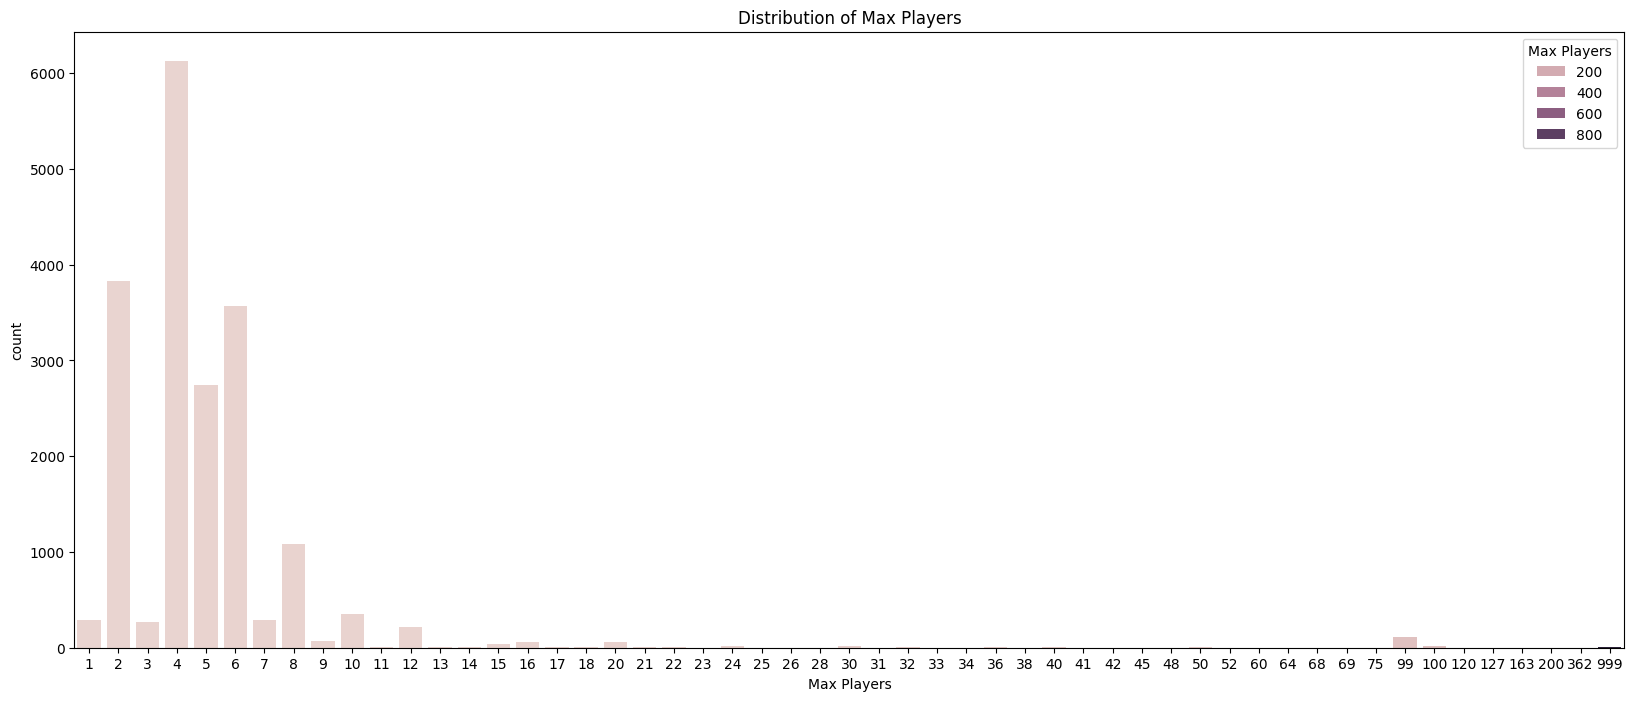

In [67]:
max_player_list = sorted(list(set(df2["Max Players"].sort_values())))

plt.figure(figsize=(20,8))
plt.title("Distribution of Max Players")
sns.countplot(x = "Max Players", data = df2, hue = "Max Players", order = max_player_list)


C:\Users\user\AppData\Local\Temp\ipykernel_26744\2784198644.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["Max Players(grouped)"][i] = str(df2["Max Players"][i])
C:\Users\user\AppData\Local\Temp\ipykernel_26744\2784198644.py:7: Set

<Axes: title={'center': 'MDistribution of Max Players(grouped)'}, xlabel='Max Players(grouped)', ylabel='count'>

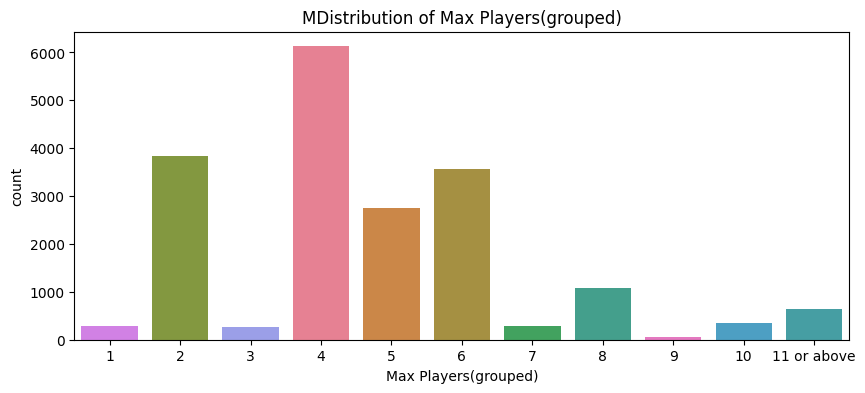

In [68]:
# As the sizes for 11 or above are too small, so we group them into a single group
df2["Max Players(grouped)"] = 0
for i in range(0, df2["Max Players"].count()):
    if df2["Max Players"][i] >= 11:
        df2["Max Players(grouped)"][i] = "11 or above"
    else:
        df2["Max Players(grouped)"][i] = str(df2["Max Players"][i])

max_player_list2 = sorted(list(set(df2["Max Players(grouped)"].sort_values())))
max_player_list2 =  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11 or above']
plt.figure(figsize=(10,4))
plt.title("MDistribution of Max Players(grouped)")
sns.countplot(x = "Max Players(grouped)", data = df2, hue = "Max Players(grouped)", order = max_player_list2)

In [69]:
for i in range(0, df2_total_number):
    if df2["Max Players"][i] < df2["Min Players"][i]:
        print("Error!")

# Play Time

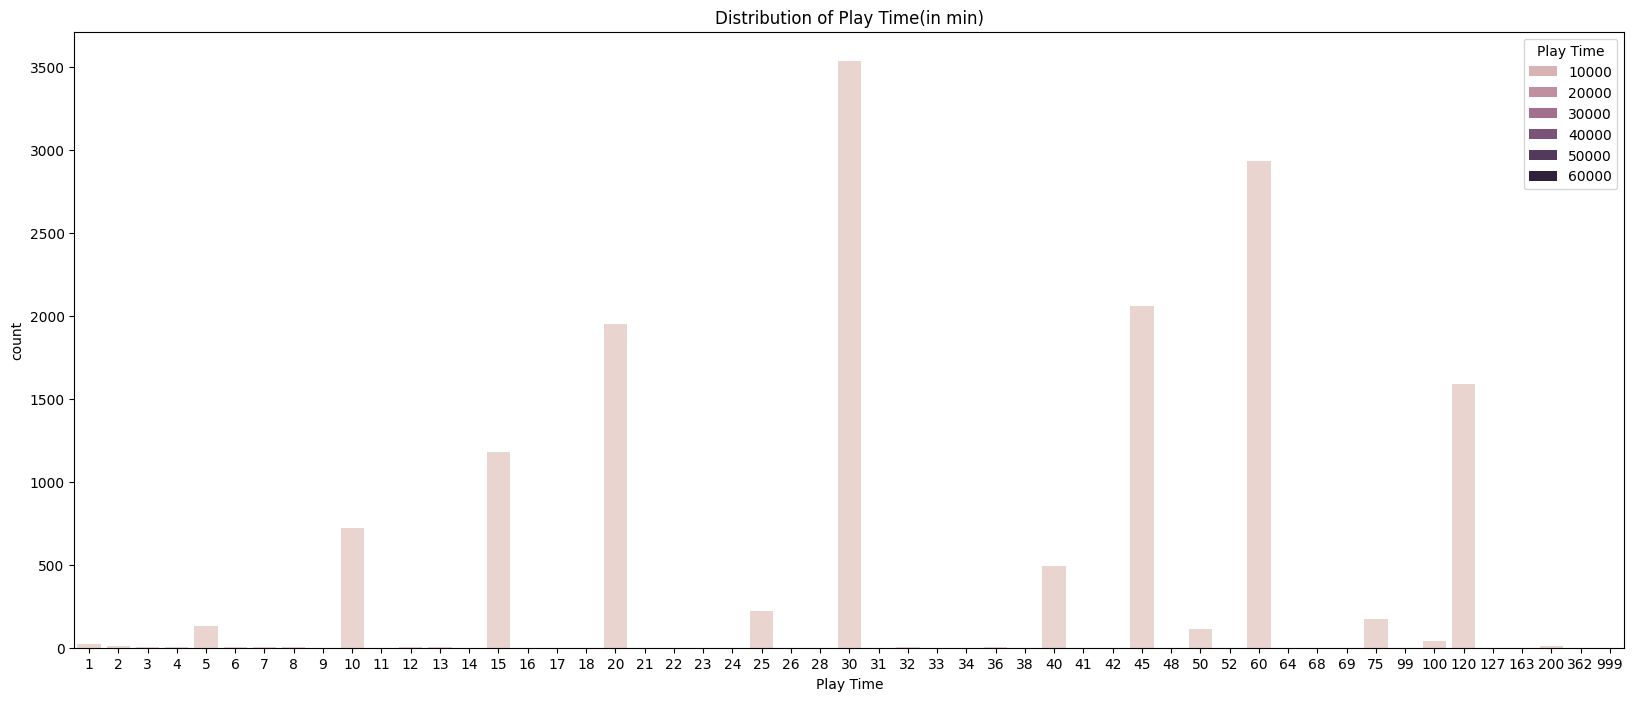

In [70]:
plt.figure(figsize=(20,8))
plt.title("Distribution of Play Time(in min)")
sns.countplot(x = "Play Time", data = df2, hue = "Play Time", order = max_player_list)
plt.xlabel = "Play Time(min)"
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_26744\1379369508.py:29: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["Play Time(grouped)"][i] = "61 min or above"
C:\Users\user\AppData\Local\Temp\ipykernel_26744\1379369508.py:29: SettingWithC

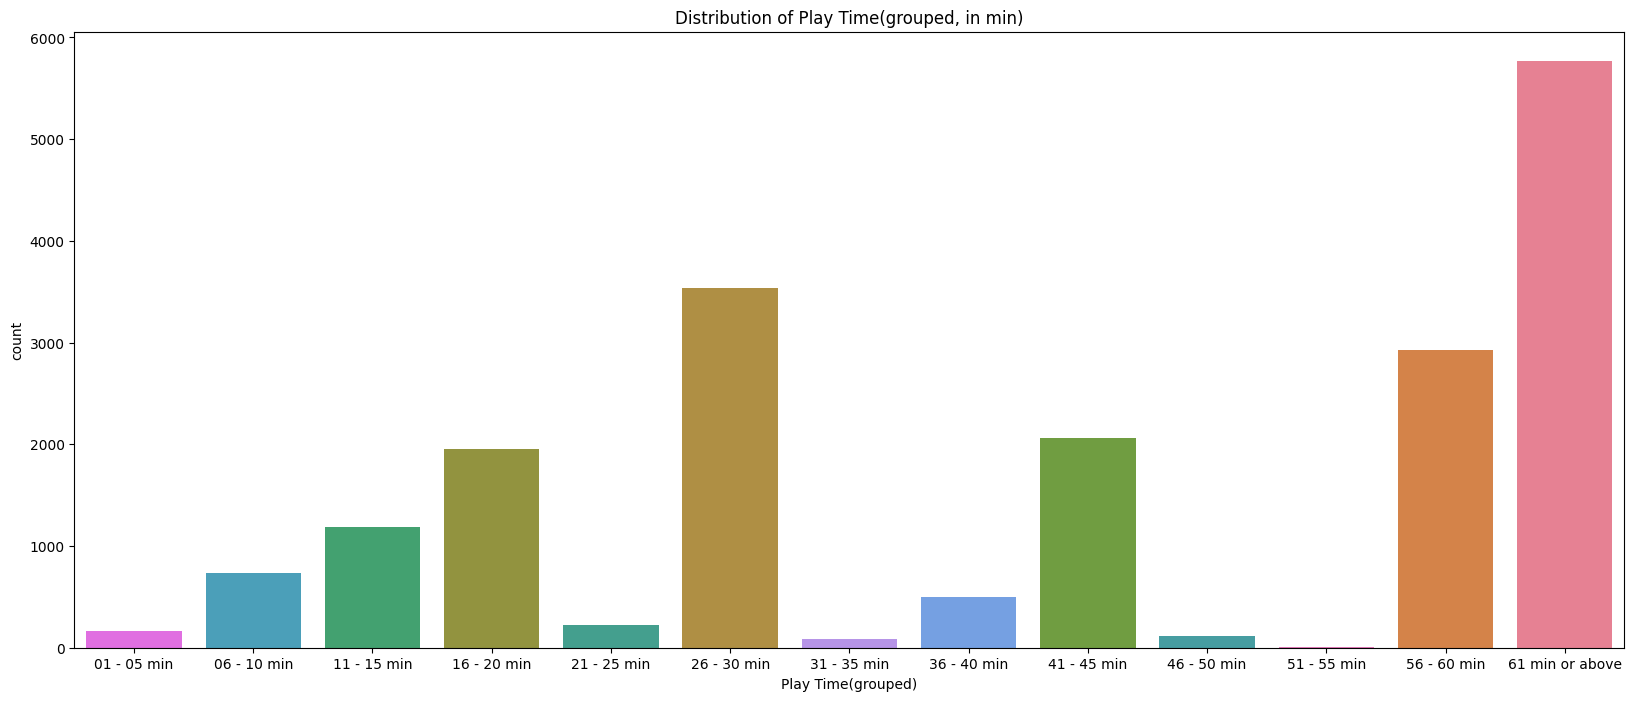

In [71]:
# As play times are mostly multiple of 5, so we group them into different group, also group the play time with 60 or more into singlt group
df2["Play Time(grouped)"] = 0
for i in range(0, df2["Play Time"].count()):
    if df2["Play Time"][i] <= 5:
        df2["Play Time(grouped)"][i] = "01 - 05 min"
    elif df2["Play Time"][i] <= 10:
        df2["Play Time(grouped)"][i] = "06 - 10 min"
    elif df2["Play Time"][i] <= 15:
        df2["Play Time(grouped)"][i] = "11 - 15 min"
    elif df2["Play Time"][i] <= 20:
        df2["Play Time(grouped)"][i] = "16 - 20 min"
    elif df2["Play Time"][i] <= 25:
        df2["Play Time(grouped)"][i] = "21 - 25 min"
    elif df2["Play Time"][i] <= 30:
        df2["Play Time(grouped)"][i] = "26 - 30 min"
    elif df2["Play Time"][i] <= 35:
        df2["Play Time(grouped)"][i] = "31 - 35 min"
    elif df2["Play Time"][i] <= 40:
        df2["Play Time(grouped)"][i] = "36 - 40 min"
    elif df2["Play Time"][i] <= 45:
        df2["Play Time(grouped)"][i] = "41 - 45 min"
    elif df2["Play Time"][i] <= 50:
        df2["Play Time(grouped)"][i] = "46 - 50 min"
    elif df2["Play Time"][i] <= 55:
        df2["Play Time(grouped)"][i] = "51 - 55 min"
    elif df2["Play Time"][i] <= 60:
        df2["Play Time(grouped)"][i] = "56 - 60 min"
    else:
        df2["Play Time(grouped)"][i] = "61 min or above"

play_time_list = sorted(list(set(df2["Play Time(grouped)"].sort_values())))
plt.figure(figsize=(20,8))
plt.title("Distribution of Play Time(grouped, in min)")
sns.countplot(x = "Play Time(grouped)", data = df2, hue = "Play Time(grouped)", order = play_time_list)
plt.xlabel = "Play Time(grouped)(min)"
plt.show()

# Rating Average

<Axes: title={'center': 'Distribution Rating Average'}, xlabel='Rating Average'>

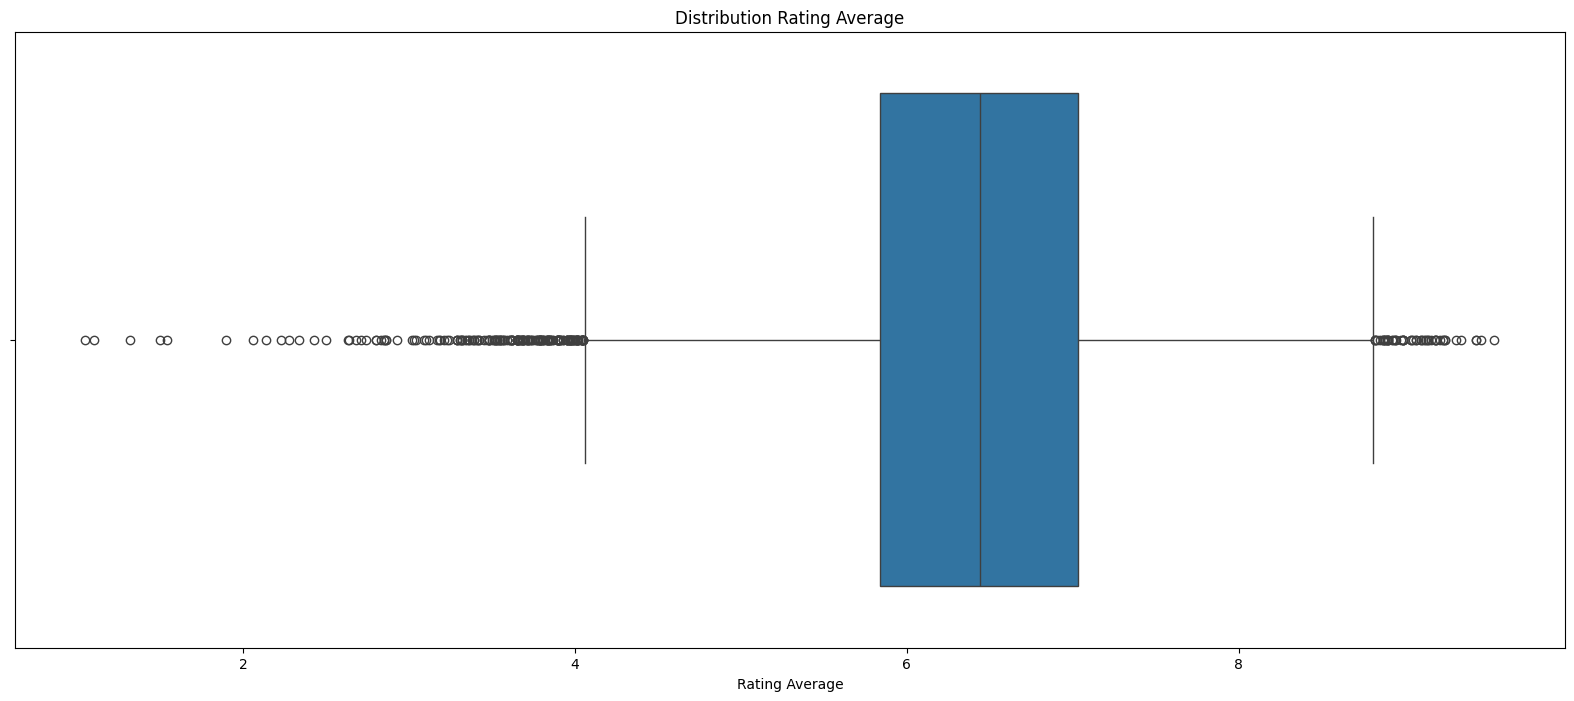

In [72]:
plt.figure(figsize=(20,8))
plt.title("Distribution Rating Average")
sns.boxplot(x = "Rating Average", data = df2)

In [73]:
owned_stats = df2["Rating Average"].describe()
owned_q1 = owned_stats['25%']
owned_q3 = owned_stats['75%']
rating_iqr = owned_q3 - owned_q1
owned_min = owned_q1 - 1.5 * rating_iqr
owned_max = owned_q3 + 1.5 * rating_iqr

print(f"Minimum value (excluding outliers): {owned_min:.2f}")
print(f"Maximum value (excluding outliers): {owned_max:.2f}")

Minimum value (excluding outliers): 4.05
Maximum value (excluding outliers): 8.82


# Complexity Average

<Axes: title={'center': 'Distribution of Complexity Average'}, xlabel='Complexity Average'>

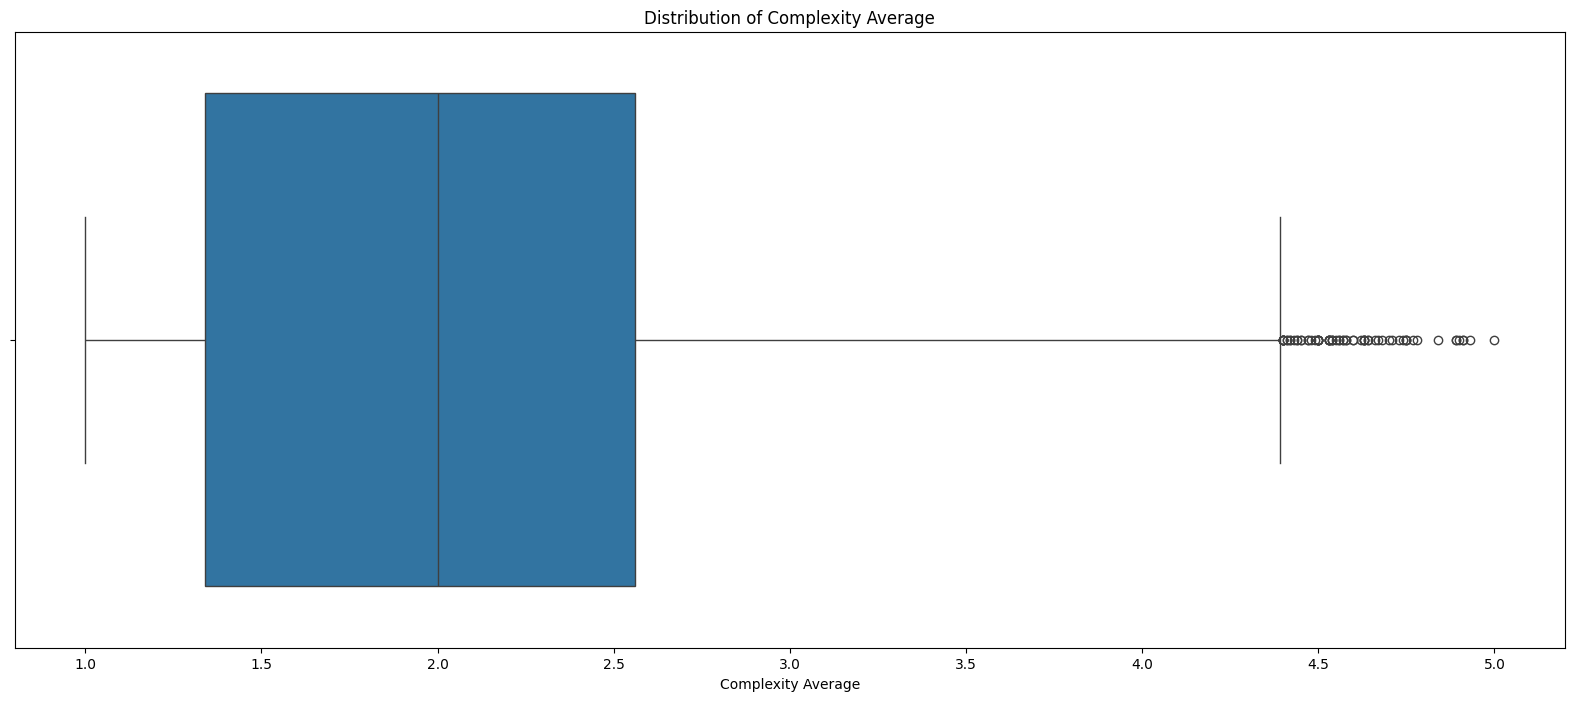

In [74]:
plt.figure(figsize=(20,8))
plt.title("Distribution of Complexity Average")
sns.boxplot(x = "Complexity Average", data = df2)

# Owned Users

In [75]:
owned_stats = df2["Complexity Average"].describe()
owned_q1 = owned_stats['25%']
owned_q3 = owned_stats['75%']
owned_iqr = owned_q3 - owned_q1
owned_min = owned_q1 - 1.5 * owned_iqr
owned_max = owned_q3 + 1.5 * owned_iqr

print(f"Minimum value (excluding outliers): {owned_min:.2f}")
print(f"Maximum value (excluding outliers): {owned_max:.2f}")
print("Number of outliers:", (df2["Complexity Average"] > owned_max).sum() , ", percentage: {:.2f} %".format((df2["Complexity Average"] > owned_max).sum() / df2_total_number * 100))

Minimum value (excluding outliers): -0.49
Maximum value (excluding outliers): 4.39
Number of outliers: 70 , percentage: 0.36 %


<Axes: title={'center': 'Distribution of Owned Users'}, xlabel='Owned Users'>

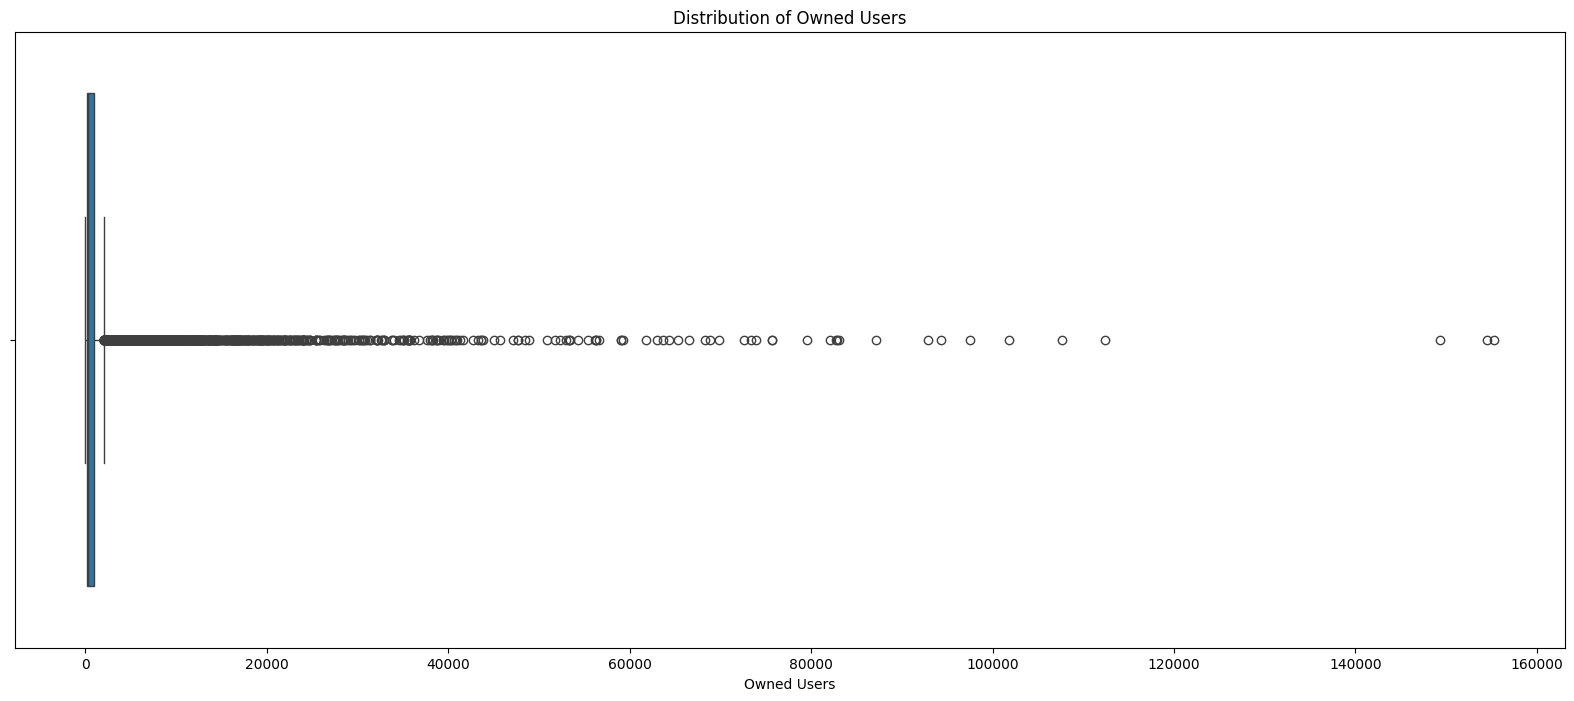

In [76]:
plt.figure(figsize=(20,8))
plt.title("Distribution of Owned Users")
sns.boxplot(x = "Owned Users", data = df2)

In [77]:
owned_stats = df2["Owned Users"].describe()
owned_q1 = owned_stats['25%']
owned_q3 = owned_stats['75%']
owned_iqr = owned_q3 - owned_q1
owned_max = owned_q3 + 1.5 * owned_iqr

print(f"Maximum value (excluding outliers): {owned_max:.2f}")

df2["Owned Users"].describe()

Maximum value (excluding outliers): 2080.50


count     19264.000000
mean       1475.601952
std        5167.866097
min           3.000000
25%         153.000000
50%         334.000000
75%         924.000000
max      155312.000000
Name: Owned Users, dtype: float64

# Mechanics

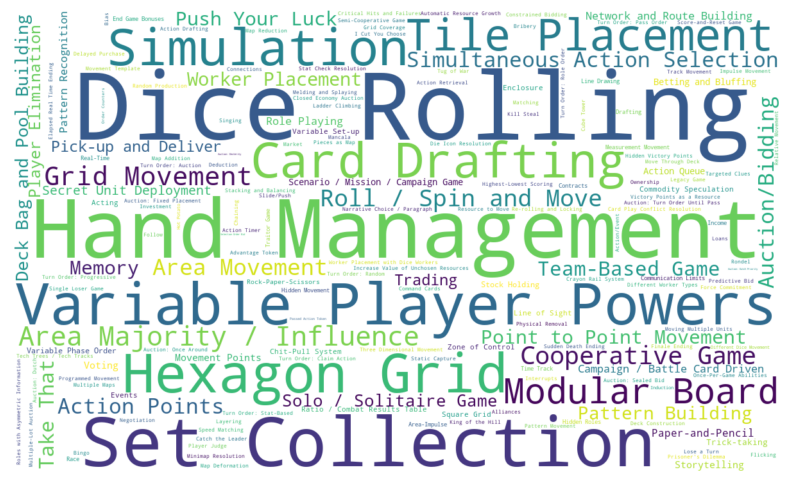

In [78]:
df2_mechanic = list((df2.dropna())["Mechanics"])

mechanic_dict = {}

for i in df2_mechanic:

    if ", " in i:
        tmp_list = i.split(", ")

        for j in tmp_list:
            if j not in mechanic_dict:
                mechanic_dict[j] = 1
            else:
                mechanic_dict[j] += 1

    else:
        if i not in mechanic_dict:
            mechanic_dict[i] = 1
        else:
            mechanic_dict[i] += 1

wordcloud = WordCloud(width=1200, height=720, background_color='white')
wordcloud.generate_from_frequencies(mechanic_dict)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bivariate Analysis

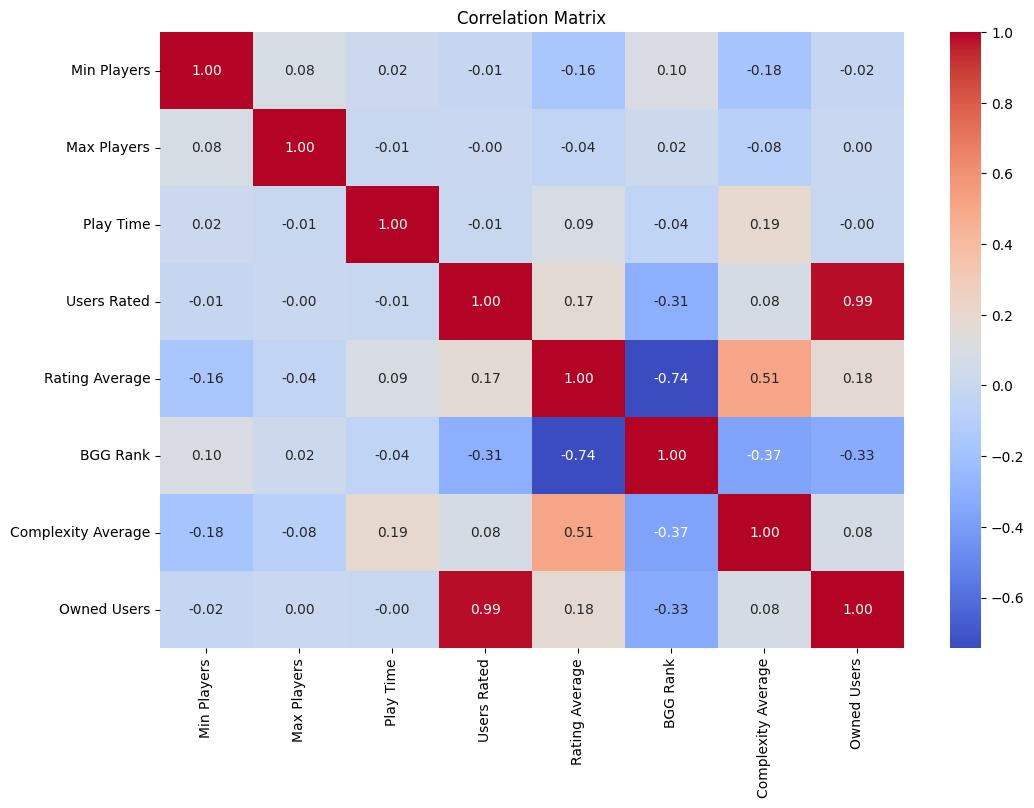

In [79]:
numeric_df2 = df2.select_dtypes(include=[np.number])
numeric_df2 = numeric_df2.drop(columns = ["index", "ID", "Year Published", "century"])

corr_matrix = numeric_df2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

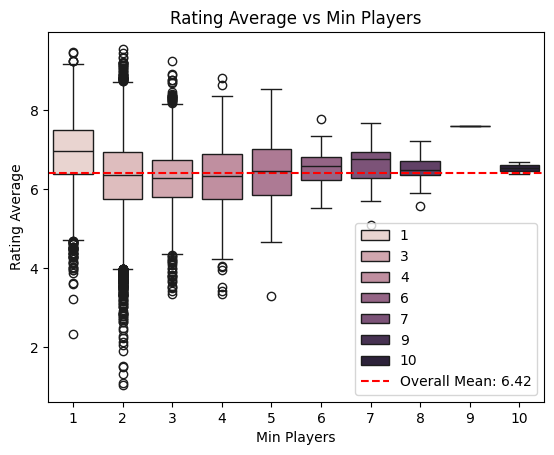

In [80]:
boxplot_min_rating = sns.boxplot(x='Min Players', y='Rating Average', hue = "Min Players", data=df2)
rating_mean = df2['Rating Average'].mean()
boxplot_min_rating.axhline(y = rating_mean, color = 'r', linestyle = '--', label = f'Overall Mean: {rating_mean:.2f}')
boxplot_min_rating.set_title('Rating Average vs Min Players')
plt.legend()
plt.show()

<Axes: xlabel='Max Players', ylabel='Rating Average'>

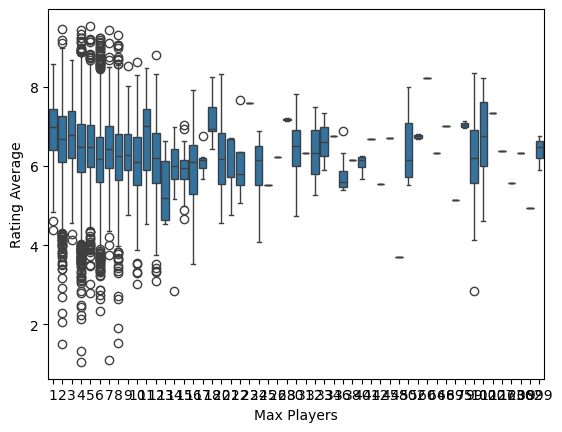

In [81]:
sns.boxplot(x='Max Players', y='Rating Average', data=df2)

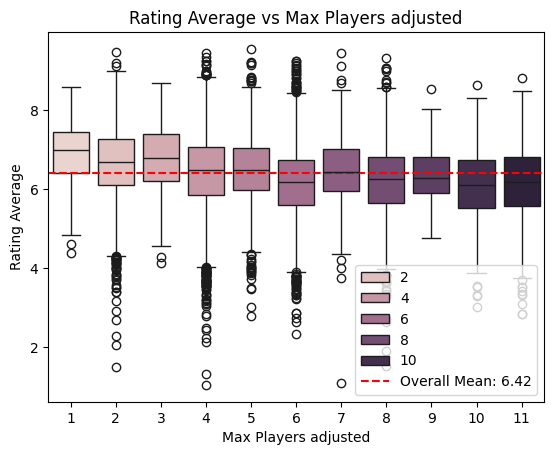

In [82]:
df2['Max Players adjusted'] = df2['Max Players'].apply(lambda x: 11 if x >= 11 else x)

boxplot_max_rating = sns.boxplot(x='Max Players adjusted', y='Rating Average', hue = 'Max Players adjusted', data=df2)
boxplot_max_rating.axhline(y = rating_mean, color = 'r', linestyle = '--', label = f'Overall Mean: {rating_mean:.2f}')
boxplot_max_rating.set_title("Rating Average vs Max Players adjusted")
plt.legend()
plt.show()

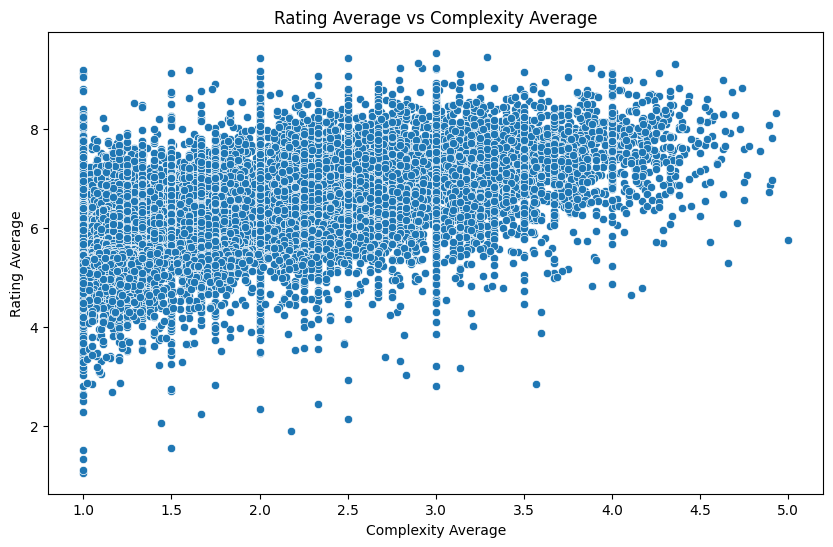

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Complexity Average', y='Rating Average',  data=df2)
plt.title('Rating Average vs Complexity Average')

plt.show()

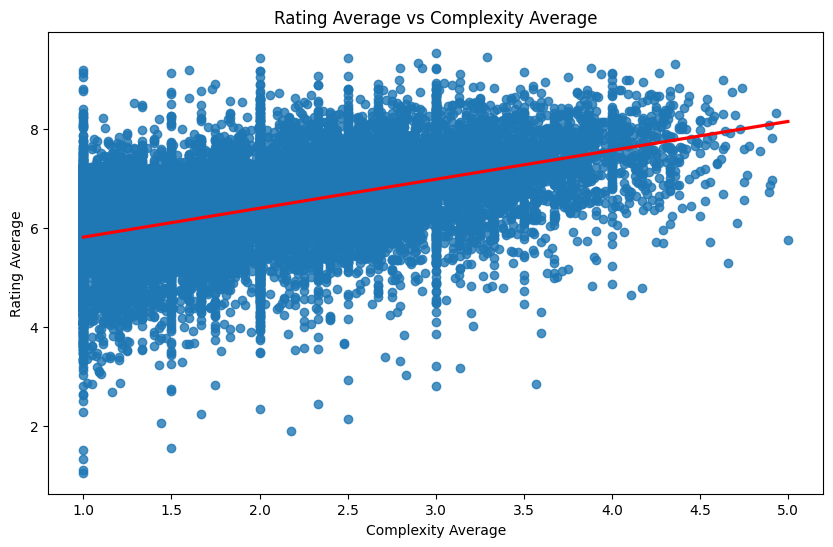

In [84]:
plt.figure(figsize=(10, 6))
complexity_vs_rating_reg = sns.regplot(x='Complexity Average', y='Rating Average',  data=df2, line_kws = {"color": "red"})
plt.title('Rating Average vs Complexity Average')

plt.show()

In [85]:
slope, intercept, r_value, p_value, stderr = \
scipy.stats.linregress(df2['Complexity Average'], df2['Rating Average'])

print(f"slope: {slope:.2f}")
print(f"intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"stderr: {stderr:.2f}")

slope: 0.58
intercept: 5.23
R-squared: 0.26
p-value: 0.0000
stderr: 0.01


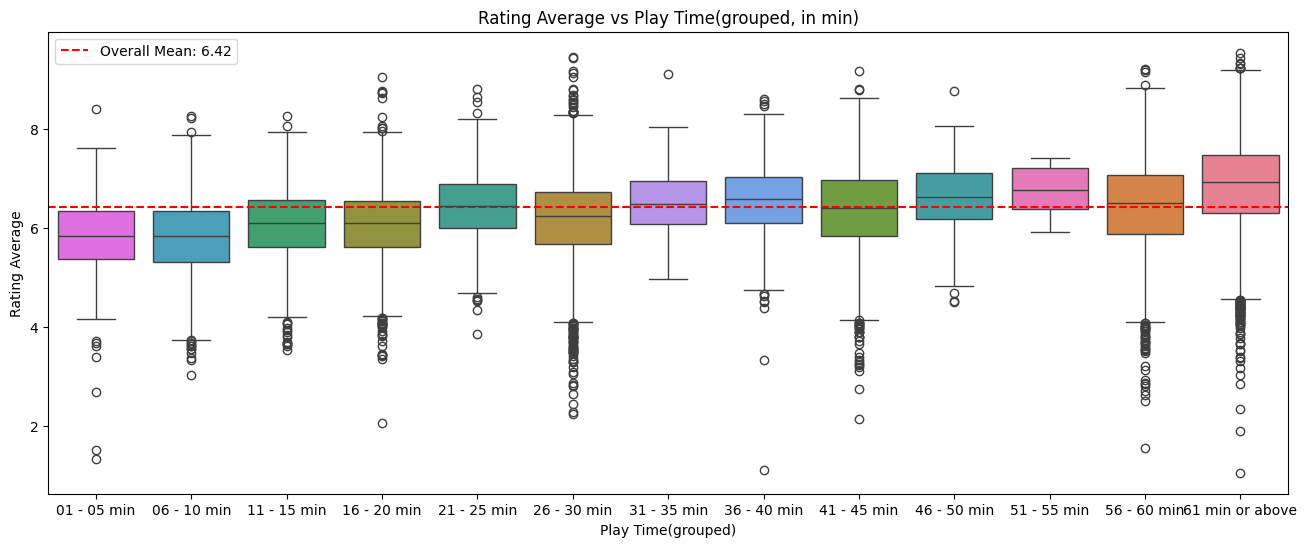

In [86]:
plt.figure(figsize=(16, 6))
boxplot_time_rating = sns.boxplot(x = 'Play Time(grouped)', y = 'Rating Average', data = df2, hue = 'Play Time(grouped)', order = play_time_list)
plt.title('Rating Average vs Play Time(grouped, in min)')
plt.xlabel = "Play Time(grouped)(min)"

boxplot_time_rating.axhline(y = rating_mean, color = 'r', linestyle = '--', label = f'Overall Mean: {rating_mean:.2f}')
plt.legend()
plt.show()

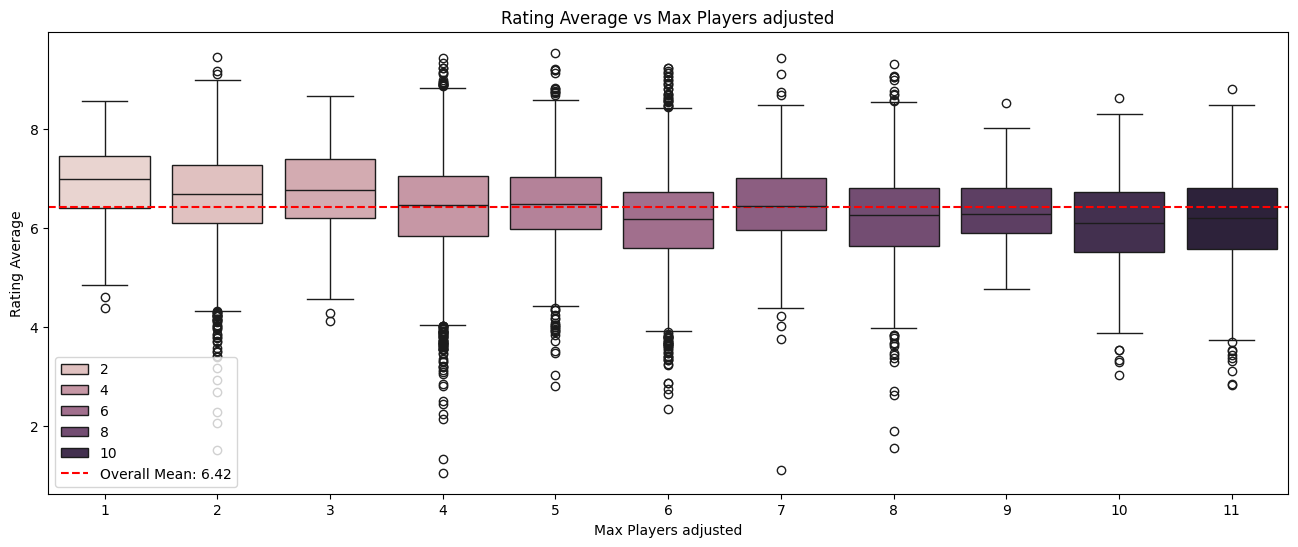

In [87]:
plt.figure(figsize=(16, 6))
boxplot_maxa_rating = sns.boxplot(x = 'Max Players adjusted', y = 'Rating Average', hue = 'Max Players adjusted', data = df2)
plt.title('Rating Average vs Max Players adjusted')

boxplot_maxa_rating.axhline(y = rating_mean, color = 'r', linestyle = '--', label = f'Overall Mean: {rating_mean:.2f}')
plt.legend()
plt.show()

# Multivariate Analysis

In [88]:
df2["Play Time adjusted"] = df2["Play Time"].apply(lambda x: 60 if x >= 60 else x)

x = df2[['Min Players', 'Max Players adjusted', "Play Time adjusted", 'Complexity Average']]
y = df2['Rating Average']

model = LinearRegression()
model.fit(x, y)

print('Intercept:', model.intercept_)
print(f'Coefficients: {[round(c, 6) for c in model.coef_.tolist()]}')
print('R-squared:', model.score(x, y))

Intercept: 5.464091694895461
Coefficients: [-0.097601, -0.001535, 7.6e-05, 0.567303]
R-squared: 0.2651588899041728


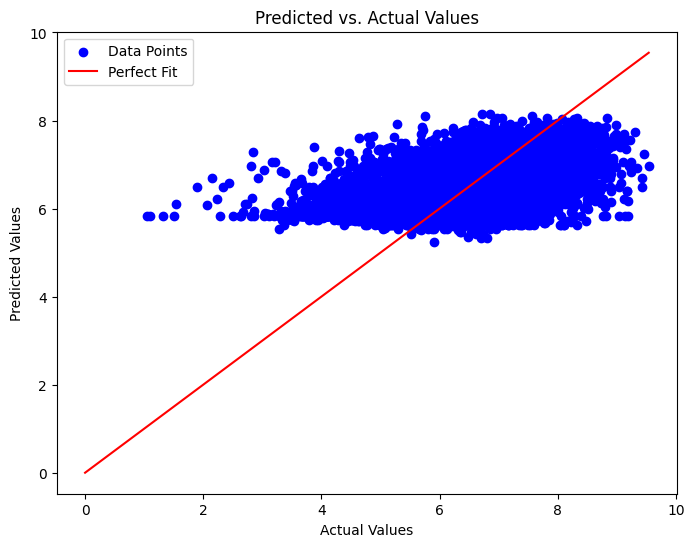

In [89]:
actual_values = []
predicted_values = []



for i in range(0, df2_total_number):
    actual_values.append(df2["Rating Average"][i])
    predicted_values.append(model.coef_[0] * df2["Min Players"][i] + model.coef_[1] * df2["Max Players adjusted"][i] + \
                            model.coef_[2] * df2["Play Time adjusted"][i] + model.coef_[3] * df2["Complexity Average"][i] + \
                            model.intercept_)
    

fig, ax = plt.subplots(figsize=(8, 6))

# 绘制预测值和实际值
ax.scatter(actual_values, predicted_values, color='blue', label='Data Points')

# 添加对角线参考线
max_value = max(max(actual_values), max(predicted_values))
ax.plot([0, max_value], [0, max_value], color='red', label='Perfect Fit')

# 设置坐标轴标签和标题
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Predicted vs. Actual Values')
ax.legend()

# 显示图表
plt.show()

In [90]:
df3 = df2.dropna(subset = ["Mechanics"])

In [91]:
df3['mechanics_list'] = df3['Mechanics'].str.split(', ')
df3 = df3.explode('mechanics_list')

C:\Users\user\AppData\Local\Temp\ipykernel_26744\3971812356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['mechanics_list'] = df3['Mechanics'].str.split(', ')


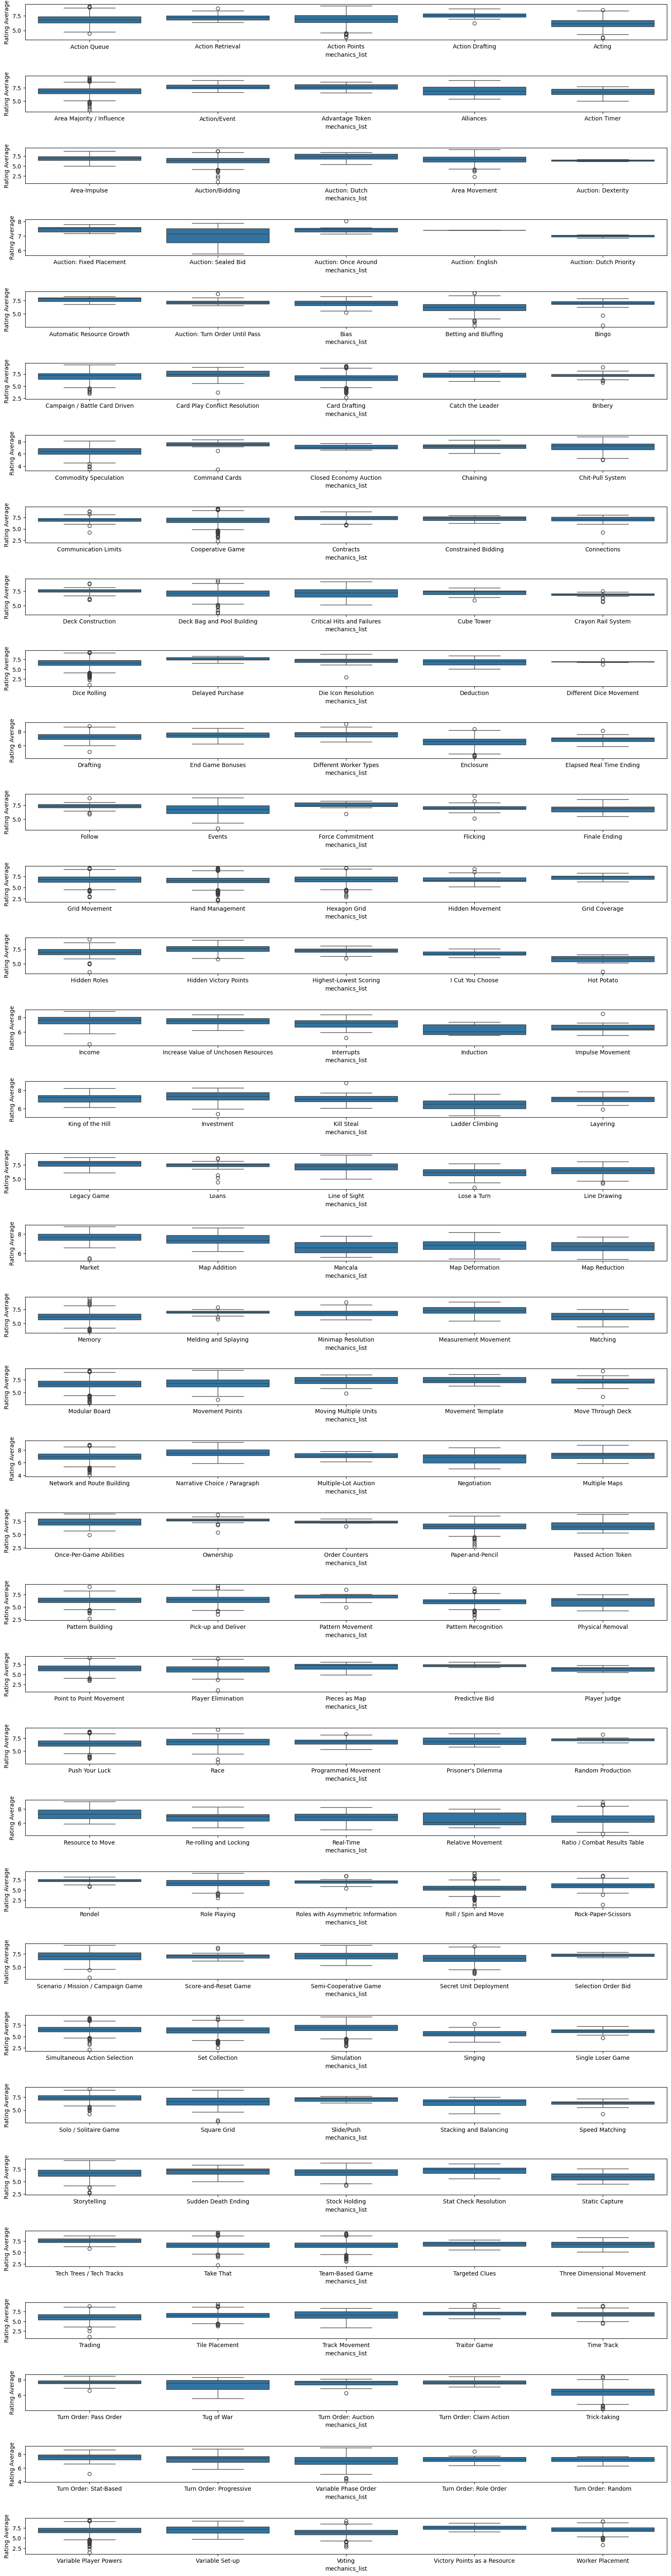

In [92]:
mechanic_set = sorted(list(set(df3['mechanics_list'])))
group_size = 5
num_groups = len(mechanic_set) // group_size

fig, axes = plt.subplots(num_groups, 1, figsize=(20, 80))

for i in range(num_groups):
    start = i * group_size
    end = start + group_size
    current_mechanics = mechanic_set[start:end]
    
    sns.boxplot(x='mechanics_list', y='Rating Average', data=df3[df3['mechanics_list'].isin(current_mechanics)], ax=axes[i])
    
    axes[i].set_ylabel('Rating Average')

plt.subplots_adjust(hspace=1)
plt.show()